In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
# %tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

import keras
assert keras.__version__ == "2.1.6"
print(keras.__version__)

# Root directory of the project
ROOT_DIR = os.path.abspath("./")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

import urllib.request
import shutil
GRAPES_MODEL_URL = "https://github.com/LesleyDing/Grape-Segmentation/releases/download/v1.0/mask_rcnn_grapes.h5"

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
GRAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_grapes.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(GRAPES_MODEL_PATH):
    print("Downloading pretrained model to " + GRAPES_MODEL_PATH + " ...")
    with urllib.request.urlopen(GRAPES_MODEL_URL) as resp, open(GRAPES_MODEL_PATH, 'wb') as out:
        shutil.copyfileobj(resp, out)
        print("... done downloading pretrained model!")
else:
    print("... done downloading pretrained model!")

1.5.0


Using TensorFlow backend.


2.1.6
... done downloading pretrained model!


In [2]:
class GrapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "grapes"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2

    LEARNING_RATE = 0.0005

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + grape

    # # generate more proposals.
    # RPN_NMS_THRESHOLD = 0.9
    # TRAIN_ROIS_PER_IMAGE = 512

    # Minimum probability value to accept a detected instance
    # ROIs below this threshold are skipped
    DETECTION_MIN_CONFIDENCE = 0.5

    
config = GrapesConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0005
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

In [3]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [11]:
class InferenceConfig(GrapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.7

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")

# use earlier saved model
model_path = GRAPES_MODEL_PATH

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  C:\Users\LesleyT\Desktop\Grape-Segmentation\mask_rcnn_grapes.h5


In [5]:
import skimage
IMAGE_DIR = os.path.join(ROOT_DIR, "other_test")
class_names = ['BG', 'grapes']

Processing 1 images
image                    shape: (1360, 2048, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2048.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


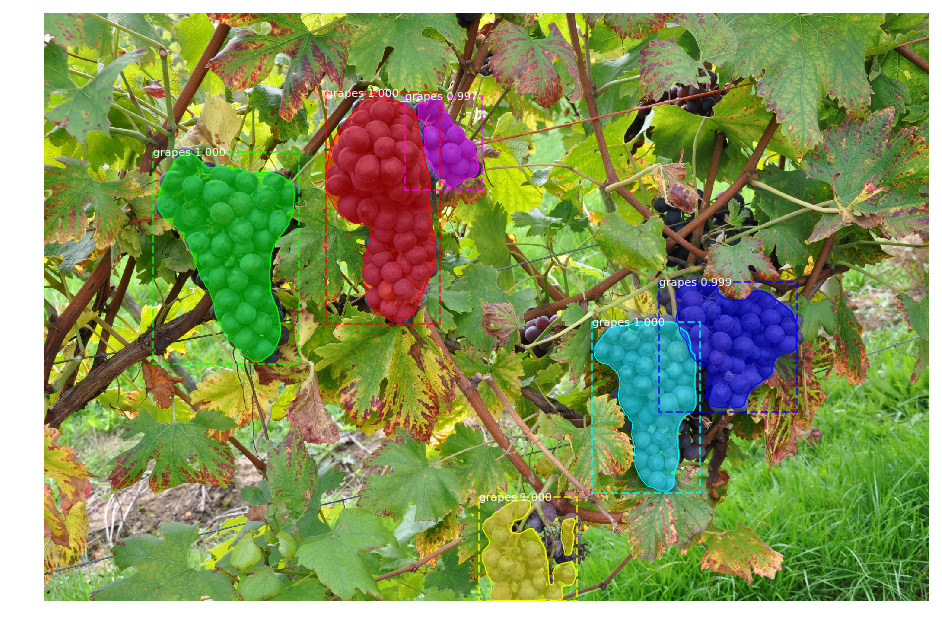

In [13]:
# Test on a random image
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]

file = np.random.choice(file_names)
image = skimage.io.imread(os.path.join(IMAGE_DIR, file))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                          class_names, r['scores'])

In [ ]:
# Test on a all image in the dir

file_names = next(os.walk(IMAGE_DIR))[2]
for file in file_names:
    image = skimage.io.imread(os.path.join(IMAGE_DIR, file))

    # Run detection
    results = model.detect([image], verbose=1)

    # Visualize results
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              class_names, r['scores'])